In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("D:/3-semester/BABI/Advertising.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df_clean=df.loc[:,~df.columns.str.contains('Unnamed')]
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
labels=df_clean['sales']
features=df_clean.drop(['sales'],axis=1)

In [10]:
print(labels.head(4))
print(features.head(4))

0    22.1
1    10.4
2     9.3
3    18.5
Name: sales, dtype: float64
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5


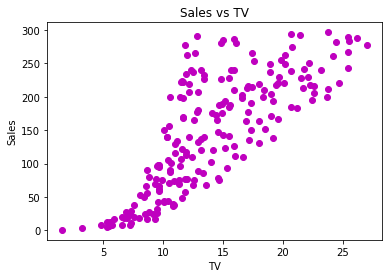

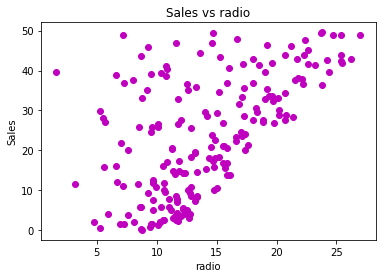

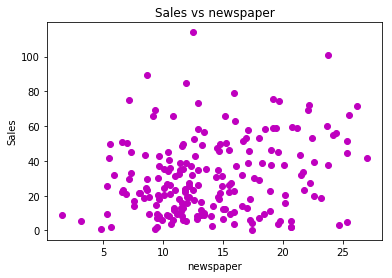

In [15]:
for x in features:
    plt.plot(labels,features[x],'mo')
    plt.title("Sales vs " + x)
    plt.ylabel("Sales")
    plt.xlabel(x)
    plt.show()

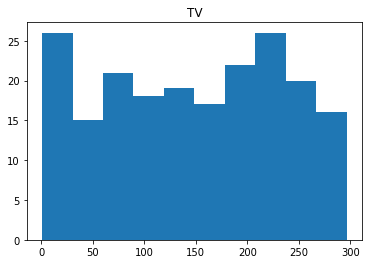

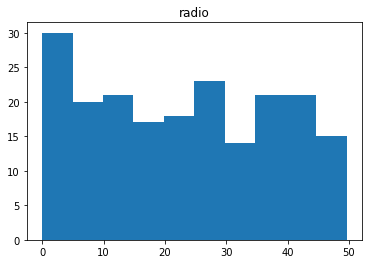

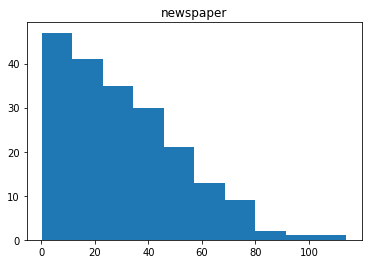

In [16]:
for x in features:
    plt.hist(features[x])
    plt.title(x)
    plt.show()

In [18]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model2=sm.ols(formula="sales~TV",data=df_clean).fit()
print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           4.83e-98
Time:                        10:13:16   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [28]:
p1=model1.predict()
df1=pd.DataFrame({'Actuals':labels,'Predicted':p1})
#df1.head(200)
print("Standard error:",model1.bse)
#print(model1.params)

Standard error: Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64


In [23]:
p2=model2.predict()
df2=pd.DataFrame({'Actuals':labels,'Predicted':p1})
df2.head()

,Actuals,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
